In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
import joblib
import time

In [16]:
# === 1. Baca Dataset ===
df = pd.read_csv("dataset/diabetes.csv")

print("=== 5 Baris Pertama Dataset ===")
print(df.head())

print("\n=== Info Dataset ===")
print(df.info())

print("\n=== Statistik Deskriptif ===")
print(df.describe())

=== 5 Baris Pertama Dataset ===
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

=== Info Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 

In [17]:
# === 2. Pisahkan Fitur dan Target ===
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [18]:
# === 3. Bagi Data Menjadi Train dan Test (70:30) ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [19]:
# === 4. Buat dan Latih Model Random Forest ===
model = RandomForestClassifier(n_estimators=100, random_state=42)

start = time.time()
model.fit(X_train, y_train)
training_time = time.time() - start

In [20]:
# === 5. Evaluasi Model ===
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

acc_train = accuracy_score(y_train, model.predict(X_train))
acc_test = accuracy_score(y_test, y_pred)

print("\n=== HASIL TRAINING ===")
print(f"Waktu training : {training_time:.3f} detik")
print(f"Akurasi Train  : {acc_train:.4f}")
print(f"Akurasi Test   : {acc_test:.4f}")


=== HASIL TRAINING ===
Waktu training : 0.110 detik
Akurasi Train  : 1.0000
Akurasi Test   : 0.7489



=== CONFUSION MATRIX ===
[[130  20]
 [ 38  43]]


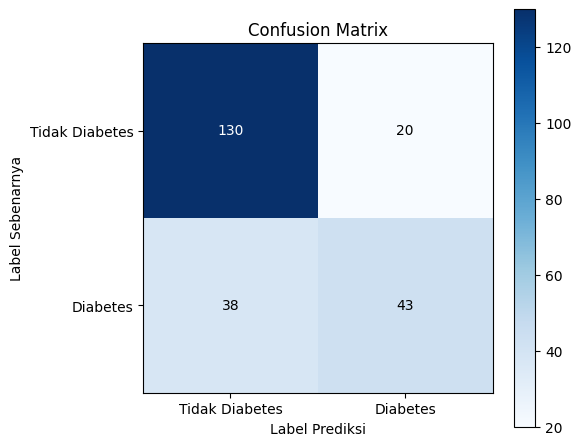

In [21]:
# === 6. Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred)
print("\n=== CONFUSION MATRIX ===")
print(cm)

plt.figure(figsize=(6,5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
classes = ['Tidak Diabetes', 'Diabetes']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Label angka di tiap kotak
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Label Sebenarnya')
plt.xlabel('Label Prediksi')
plt.tight_layout()
plt.show()

In [22]:
# === 7. Classification Report ===
print("\n=== CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred, target_names=classes))


=== CLASSIFICATION REPORT ===
                precision    recall  f1-score   support

Tidak Diabetes       0.77      0.87      0.82       150
      Diabetes       0.68      0.53      0.60        81

      accuracy                           0.75       231
     macro avg       0.73      0.70      0.71       231
  weighted avg       0.74      0.75      0.74       231




AUC : 0.8192


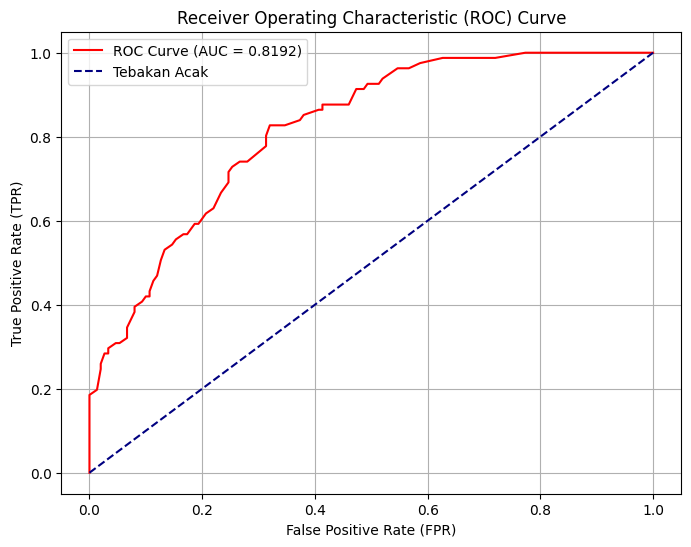

In [27]:
# === 8. ROC Curve dan AUC ===
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nAUC : {auc:.4f}")

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='red', label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy', label='Tebakan Acak')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()


=== FEATURE IMPORTANCE ===
                      Fitur  Pentingnya
1                   Glucose    0.272161
5                       BMI    0.151320
7                       Age    0.129989
6  DiabetesPedigreeFunction    0.118306
0               Pregnancies    0.096944
2             BloodPressure    0.089079
4                   Insulin    0.073077
3             SkinThickness    0.069124


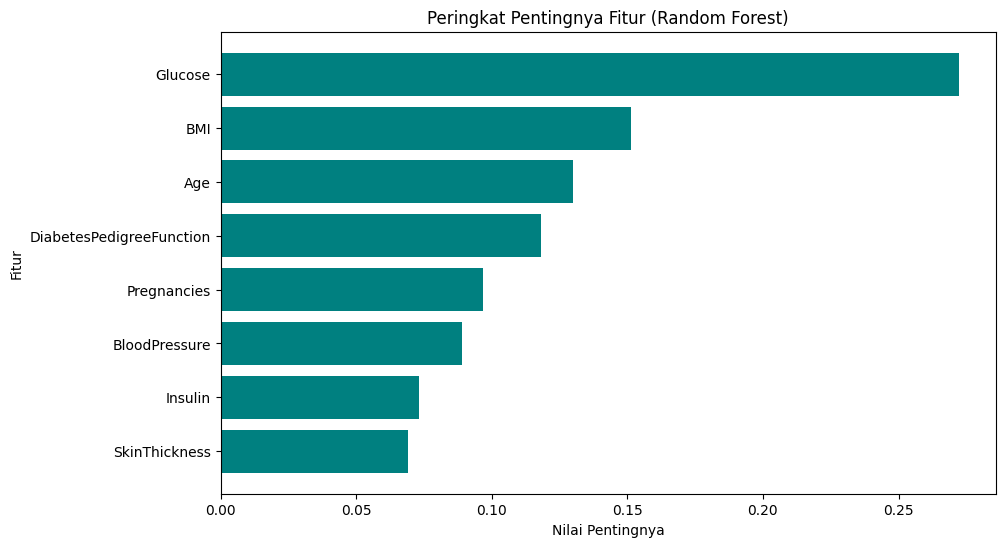

In [28]:
# === 9. Feature Importance ===
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Fitur': X.columns,
    'Pentingnya': importances
}).sort_values(by='Pentingnya', ascending=False)

print("\n=== FEATURE IMPORTANCE ===")
print(feature_importance_df)

plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Fitur'], feature_importance_df['Pentingnya'], color='teal')
plt.xlabel('Nilai Pentingnya')
plt.ylabel('Fitur')
plt.title('Peringkat Pentingnya Fitur (Random Forest)')
plt.gca().invert_yaxis()
plt.show()


In [29]:
# === 10. Simpan Model ===
import os          # <-- tambahkan baris ini kalau belum ada
import joblib      # pastikan juga joblib sudah diimport di atas

os.makedirs("model", exist_ok=True)
joblib.dump(model, "model/diabetes_rf_model.joblib")
print("\n✅ Model berhasil disimpan di 'model/diabetes_rf_model.joblib'")



✅ Model berhasil disimpan di 'model/diabetes_rf_model.joblib'
